# Things to do

- run with best estimate values on everything 
- decide if I want to include quantum economic advantage line 
- make graphs look like in seaborn or something
- add everything to slides

# Things to do 
- make canva diagram of quantum pipeline for machine learning 
- fill in useful problem sizes if needed


In [2]:

import importlib
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from copy import deepcopy
from decimal import Decimal, getcontext, DecimalException
import math
from scipy.optimize import curve_fit
import sympy as sp
from matplotlib.font_manager import FontProperties

In [3]:

# put in all config parameters above
# classical_runtime = "n**n*sqrt(2*3.1415*n)*exp(-n)"
# quantum_runtime = "n**5"

#constants in different format 
error_reduction_rate = .28
gate_speed_improvement_rate = .14
classical_speed_init = 1/(5*1e9) # seconds
superconducting_gate_speed_init = (1/(5*1e9))*(10**3.78) # seconds
initial_error = 10**(-2.5)
classical_speed_improvement_rate = 0.3
number_of_processors = 1e5
MAX_PROBLEM_SIZE = 1e50 #maximum problem sized considered in calculations
# not using but important numbers to note
# q_ops_second_dollar = 1e8*1e7
#     ops_second_dollar = 1e17*1e7
#     classical_improvement_rate = 0.3
#     quantum_improvement_rate = 0.3


#default quantum and classical runtime if not specified
classical_runtime = "n"
quantum_runtime = "n**0.5"


# Code to Deal With Quantum Roadmaps and Feasability

In [4]:

# gives the logical to physical overhead based on the surface code formula 
def surface_code_formula(pP:float)->float:
    pL = 1e-18
    pth = 1e-2
    numerator = 4 * math.log(math.sqrt(10 * pP / pL))
    denominator = math.log(pth / pP)
    fraction = numerator / denominator
    f_QEC = (fraction + 1) ** -2
    return f_QEC**-1
# I'm assuming logarithmic qubits to problem size
# def problem_size_qubit_feasible(roadmap:dict)->callable:
#     MAX_PROBLEM_SIZE = 1e50
#     # fit exponential to roadmap 
#     years = np.array(list(roadmap.keys()))
#     qubits = np.array(list(roadmap.values()))
#     min_year = min(years)
#     # initial gues 
#     p0 = [min(qubits), 0.5, 0]
#     # fit an exponential curve to the data
#     def exp_func(x, a, b, c):
#         return a * np.exp(b * (x-min_year)) + c
#     try:
#         popt, _ = curve_fit(
#             exp_func, years, qubits, p0=p0, bounds=([0, -2, -1000], [10000, 2, 1000])
#         )
#     except RuntimeError:
#         print(f"Fitting failed for {label}")
#         return None
#     # get the function
#     def func(x):
#         surf_overhead = surface_code_formula(initial_error*(1-error_reduction_rate)**(x-2025))
#         return min(2**(exp_func(x, *popt)/surf_overhead), MAX_PROBLEM_SIZE)
    return func
def problem_size_qubit_feasible(roadmap:dict)->callable:
    MAX_PROBLEM_SIZE = 1e50
    # Convert data to log scale for linear fit
    years = np.array(list(roadmap.keys()))
    qubits = np.array(list(roadmap.values()))
    min_year = min(years)
    
    # Take log of qubits for linear fit
    log_qubits = np.log(qubits)
    
    # Fit linear relationship to log data
    # y = mx + b, where x is (years-min_year)
    m, b = np.polyfit(years-min_year, log_qubits, 1)
    
    # get the function
    def func(x):
        # Convert linear fit back to exponential via exp()
        predicted_qubits = np.exp(m * (x-min_year) + b)
        surf_overhead = surface_code_formula(initial_error*(1-error_reduction_rate)**(x-2025))
        return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)
    return func
def physical_qubit_problem_size(physical_qubit:int, year:int)->float:
    surf_overhead = surface_code_formula(initial_error*(1-error_reduction_rate)**(year-2025))
    # Check if exponent would be too large before computing
    if physical_qubit/surf_overhead > math.log2(MAX_PROBLEM_SIZE):
        return MAX_PROBLEM_SIZE
    try:
        return min(2**(physical_qubit/surf_overhead), MAX_PROBLEM_SIZE)
    except OverflowError:
        return MAX_PROBLEM_SIZE


IBM_roadmap = {
    2020: 27,
    2022: 127,
    2024: 133,
    2025: 156,
    2029: 200,
    2033: 2000,
}

IBM_qubit_by_year_func = problem_size_qubit_feasible(IBM_roadmap)
IBM_qubit_by_year_func(2030)
print(physical_qubit_problem_size(100, 2025), "problem size")

# graph the max problem size by year

1.0155608438245871 problem size


# Graph of Roadmaps

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_59345/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


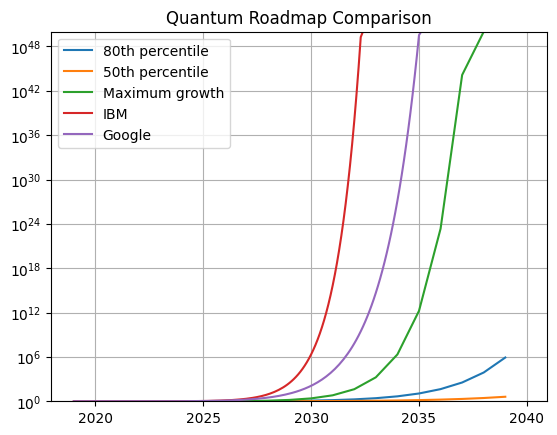

In [5]:
IBM_roadmap = {
    2020: 27,
    2022: 127,
    2024: 133,
    2025: 156,
    2029: 22974,
    2033: 100000,
}

Google_roadmap = {
    2019: 54,
    2023: 100,
    2025: 1000,
}

# Google_roadmap = {
#     2023: 336,
#     2025: 1000,
#     2027: 4000,
# }

#construct a roadmap just based on the growth rate of qubits 
start_year = 2025
end_year =2040
year_range = range(start_year, end_year, 1)
percentile_80_qubits = [physical_qubit_problem_size(52*(1.34)**(year-2025), year) for year in year_range]
percentile_50_qubits = [physical_qubit_problem_size(20*(1.22)**(year-2025), year) for year in year_range]
max_qubits = [physical_qubit_problem_size(92*(1.66)**(year-2025), year) for year in year_range]
percentile_max_qubits = [physical_qubit_problem_size(80*(1.64)**(year-2025), year) for year in year_range]
plt.plot(year_range, percentile_80_qubits, label="80th percentile")
plt.plot(year_range, percentile_50_qubits, label="50th percentile")
plt.plot(year_range, percentile_max_qubits, label="Maximum growth")
plt.legend()


#now look at feasible problem size for each of these 

Google_roadmap = Google_roadmap

years = np.arange(2019, 2040, 0.1)
IBM_qubit_by_year_func = problem_size_qubit_feasible(IBM_roadmap)
Google_qubit_by_year_func = problem_size_qubit_feasible(Google_roadmap)
Google_qubit_by_year_func = problem_size_qubit_feasible(Google_roadmap)

plt.plot(years, [IBM_qubit_by_year_func(year) for year in years], label="IBM")
plt.plot(years, [Google_qubit_by_year_func(year) for year in years], label="Google")
plt.yscale("log")
plt.ylim(1, 1e50)
plt.title("Quantum Roadmap Comparison")
plt.legend()
plt.grid(True)


# Quantum Speed Per Operation

1089.0
0.0027921477378122623
6.999999999999999e-15
speed now 0.005409779963775579
speed in 2035 vs 2025 73.19713188988429


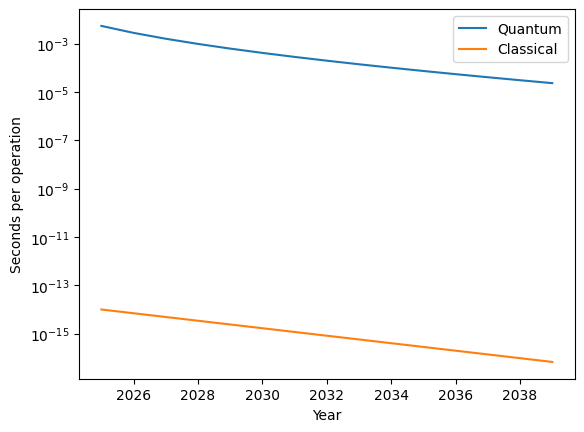

In [6]:

# print("the fQEC formula is", compute_f_QEC(1e-3))
print(surface_code_formula(1e-3))
# quantum speed per operation function 
def quantum_seconds_per_operation(year):
    gate_speed = superconducting_gate_speed_init * (1-gate_speed_improvement_rate)**(year-2025)
    #with error correction 
    fidelity_year = initial_error*(1-error_reduction_rate)**(year-2025)
    return gate_speed*surface_code_formula(fidelity_year)

def classical_seconds_per_operation(year):
    # just dividing by number of processors here for now to simplify things
    return 1e-9 *(1-classical_speed_improvement_rate)**(year-2025)/number_of_processors

#test this function out
print(quantum_seconds_per_operation(2026))
print(classical_seconds_per_operation(2026))

#graph classical vs quantum speed over time
years = np.arange(2025, 2040)
quantum_speed = [quantum_seconds_per_operation(year) for year in years]
classical_speed = [classical_seconds_per_operation(year) for year in years]

plt.plot(years, quantum_speed, label="Quantum")
plt.plot(years, classical_speed, label="Classical")
plt.xlabel("Year")
plt.ylabel("Seconds per operation")
plt.yscale("log")
plt.legend()



#quantum speed per operation now 
print("speed now", quantum_seconds_per_operation(2025))
#quantum speed per operation 2035
print("speed in 2035 vs 2025", quantum_seconds_per_operation(2025)/quantum_seconds_per_operation(2035))



In [7]:
# %%
# qea = QuantumEconAnalysis(config=config)
# qea.plot_feasible_problem(stop_year=2040)
# qea.get_problem_size(2040)



# Intersection Finding Code

In [8]:

def binary_search_intersection(
    func1, func2, low, high, tolerance=1e-5, max_iterations=1000
)->float:
    """
    Find intersection of two functions using binary search, handling very large numbers.
    
    Args:
        func1, func2: Functions to find intersection of
        low, high: Search interval bounds
        tolerance: Acceptable difference between function values
        max_iterations: Maximum number of binary search iterations
    
    Returns:
        Decimal: x-value where functions intersect, or None if no intersection found
    """
    # Set precision high enough to handle large numbers
    getcontext().prec = 100
    
    # Convert bounds to Decimal
    low = Decimal(str(low))
    high = Decimal(str(high))
    tolerance = Decimal(str(tolerance))
    
    for i in range(max_iterations):
        # Calculate midpoint using Decimal arithmetic
        mid = (low + high) / 2
        
        try:
            # Evaluate functions and convert to Decimal
            value1 = Decimal(str(func1(float(mid))))
            value2 = Decimal(str(func2(float(mid))))
            
            # Check if we found intersection within tolerance
            if abs(value1 - value2) < tolerance:
                return float(mid)
            
            # Update bounds based on comparison
            if value1 > value2:
                high = mid
            else:
                low = mid
                
            # Check if interval is too small (convergence)
            if abs(high - low) < tolerance:
                return float(mid)
                
        except (OverflowError, ValueError, DecimalException) as e:
            # Handle potential numerical errors
            if i > 0:  # Only print error if not first iteration
                print(f"Error at iteration {i}: {e}")
            
            # Try to recover by adjusting the midpoint calculation
            try:
                # Use logarithmic scale if numbers are very large
                log_low = math.log(float(low)) if float(low) > 0 else float(low)
                log_high = math.log(float(high)) if float(high) > 0 else float(high)
                mid = Decimal(str(math.exp((log_low + log_high) / 2)))
                continue
            except:
                return None
    
    # If we exit the loop without finding intersection
    print(f"No intersection found within {max_iterations} iterations")
    return None

def find_intersection_symbolic(classical_expr_str:str, quantum_expr_str:str)->float:
    x = sp.Symbol("x", real=True, nonnegative=True)
    
    # Convert the strings to Sympy expressions
    classical_expr = sp.sympify(classical_expr_str).subs(sp.Symbol("n"), x)
    quantum_expr = sp.sympify(quantum_expr_str).subs(sp.Symbol("n"), x)
    
    # Solve for intersection: classical_expr == quantum_expr
    solutions = sp.solve(sp.Eq(classical_expr, quantum_expr), x)
    
    # Filter out non-real solutions and return the minimum solution or 0
    real_solutions = [sol.evalf() for sol in solutions if sol.is_real and sol >= 0]
    if real_solutions:
        return float(min(real_solutions))
    else:
        return 0.0

def binary_search_intersection_simple(func1:callable, func2:callable, low, high, tolerance=1e-5, max_iterations=1000)->float:
    for i in range(max_iterations):
        mid = (low + high) / 2
        value1 = func1(mid)
        value2 = func2(mid)

        if abs(value1 - value2) < tolerance:
            return mid

        if value1 > value2:
            high = mid
        else:
            low = mid

        if abs(high - low) < tolerance:
            return mid

    print(f"No intersection found within {max_iterations} iterations")
    return None


# Test Case 1: Simple polynomial functions
# def test_simple_intersection():
#     print("\nTest Case 1: Simple polynomial functions")
    
#     # Define two simple functions: f(x) = x^2 and g(x) = 2x
#     x = sp.Symbol('x')
#     f = x**2
#     g = 2*x
    
#     # Convert to lambda functions
#     f_lambda = sp.lambdify(x, f)
#     g_lambda = sp.lambdify(x, g)
    
#     # Find intersection
#     intersection = binary_search_intersection(f_lambda, g_lambda, 0, 3)
#     print(f"Intersection point: {intersection}")
    
#     # Plot for visualization
#     x_vals = np.linspace(0, 3, 100)
#     plt.figure(figsize=(8, 6))
#     plt.plot(x_vals, [f_lambda(x) for x in x_vals], label='f(x) = x^2')
#     plt.plot(x_vals, [g_lambda(x) for x in x_vals], label='g(x) = 2x')
#     if intersection:
#         plt.scatter([intersection], [f_lambda(intersection)], color='red', 
#                    zorder=5, label='Intersection Point')
#     plt.grid(True)
#     plt.legend()
#     plt.title('Intersection of f(x) = x^2 and g(x) = 2x')
#     plt.show()

    
# test_simple_intersection()

## Generalized Feasability

In [9]:
#%%

# add an option for stagnation 

def find_largest_problem_size(runtime_expr, year, quantum=True, qadv_only=False, roadmap:dict=IBM_roadmap, stagnation_year=2200)->float:
    # Constants
    try:
        # Convert string expression to lambda function
        n = sp.Symbol("n")
        expr = sp.sympify(runtime_expr)

        runtime_func = sp.lambdify(n, expr)

        if quantum:
            quantum_total = lambda size: quantum_seconds_per_operation(year)*runtime_func(size)
            def quantum_limit(x):
                return 3.15*1e7 # number of seconds in a year
                # return q_ops_second_dollar

            qadv = binary_search_intersection(
                quantum_total, quantum_limit, low=1.0, high=1e50
            )

            # now I need to get feasability of the problem size
            # feasible size might be too large or none if no feasible size
            # if none make it infinity
            # size_feasible = qea.get_problem_size(year) old code based on qea packagae
            feasability_qubit_func  = problem_size_qubit_feasible(roadmap)
            size_feasible = feasability_qubit_func(year)


            # Handle the case where size_feasible is None
            if size_feasible is None:
                print(f"No feasible size found for year {year}. Returning infinity.")
                return float("inf")  # Return infinity if no feasible size is found
            if not qadv_only:
                return min(qadv, size_feasible)
            else:
                return qadv

        else:

            def classical_cost(x):
                if year < stagnation_year:  
                    return classical_seconds_per_operation(year)*runtime_func(x)
                else:
                    return classical_seconds_per_operation(stagnation_year)*runtime_func(x)

            def classical_limit(x):
                return 3.15*1e7
                # return ops_second_dollar

            return binary_search_intersection(
                classical_cost, classical_limit, low=1.0, high=1e50
            )

    except Exception as e:
        print(f"Error in function evaluation: {e}")
        return None



# test find largest problem size
find_largest_problem_size("n**.5", 2030)

2196335.471944894

In [10]:
# find largers problem size with altered classical method with stagnation 

def find_largest_problem_size_stagnation(runtime_expr, year, quantum=True)->float:
    n = sp.Symbol("n")
    expr = sp.sympify(runtime_expr)

    runtime_func = sp.lambdify(n, expr)
    
    def classical_cost(x):
        if year < 2030:

            return runtime_func(x)*classical_seconds_per_operation(year)
        else:
            return runtime_func(x)*classical_seconds_per_operation(2030)
    def classical_limit(x):
        # return ops_second_dollar
        return 3.15*1e7
    
    return binary_search_intersection( classical_cost, classical_limit, low=1.0, high=1e50)


In [11]:
# %%

# Find largest problem size for quantum runtime in 2026
result = find_largest_problem_size(quantum_runtime, 2026, quantum=True)
print(f"Largest problem size: {result}")


Largest problem size: 1.3054468271556738


In [12]:
# %%
classical_result = find_largest_problem_size(classical_runtime, 2026, quantum=False)
print(f"Largest problem size: {classical_result}")

Largest problem size: 4.4999999999986096e+21


Symbolic solutions: 0.0
This is the quantum economic advantage year
1.2581615967714019e+24


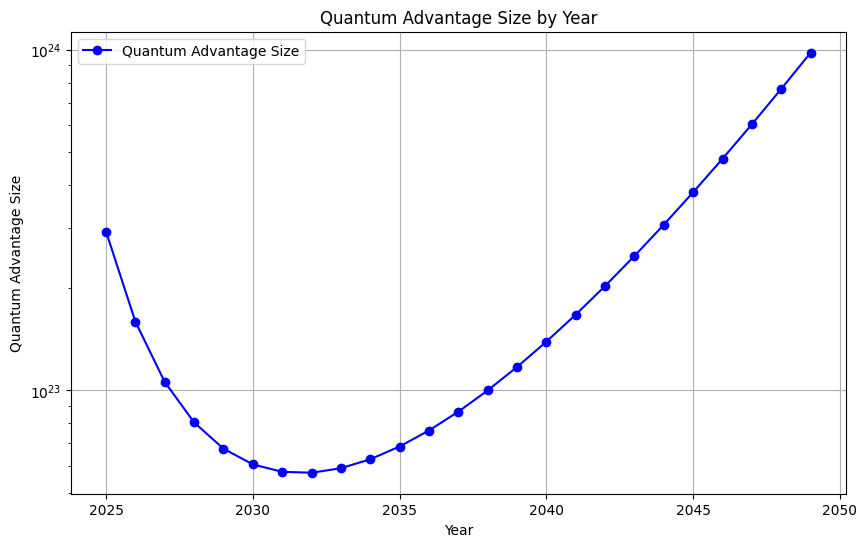

In [10]:
# Example usage
classical_runtime = "n"
quantum_runtime = "n**0.5"


solutions = find_intersection_symbolic(classical_runtime, quantum_runtime)
print("Symbolic solutions:", solutions)


def quantum_advantage_size_by_year(year, classical_runtime_string:str, quantum_runtime_string:str)->float:
    quantum_improvement_rate = 0.3
    classical_improvement_rate = 0.1
    
    x, n = sp.symbols("x n")
    class_expr = sp.sympify(classical_runtime_string).subs(n, x)
    class_expr = class_expr * classical_seconds_per_operation(year)
    classical_runtime_func = sp.lambdify(x, class_expr, "numpy")

    quant_expr = sp.sympify(quantum_runtime_string).subs(n, x)
    quant_expr = quant_expr * quantum_seconds_per_operation(year)
    quantum_runtime_func = sp.lambdify(x, quant_expr, "numpy")

    # Find intersection using the original string expressions
    return binary_search_intersection(classical_runtime_func,quantum_runtime_func,1.0,1e50)


print("This is the quantum economic advantage year")
print(quantum_advantage_size_by_year(2050, classical_runtime, quantum_runtime))

# #now graph intersection by year 
# import matplotlib.pyplot as plt

# # Define runtime expressions
# classical_runtime = "n"
# quantum_runtime = "2*n**0.5"

# Define the range of years
years = range(2025, 2050)

# Calculate the quantum advantage size for each year
quantum_advantage_sizes = [quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime) for year in years]

# Filter out None values for plotting
filtered_years = [year for year, size in zip(years, quantum_advantage_sizes) if size is not None]
filtered_sizes = [size for size in quantum_advantage_sizes if size is not None]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(filtered_years, filtered_sizes, marker='o', linestyle='-', color='b', label='Quantum Advantage Size')
plt.xlabel('Year')
plt.ylabel('Quantum Advantage Size')
plt.title('Quantum Advantage Size by Year')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()



In [20]:
# find the intersection of quantum max computable problem size and quantum economic advantage use binary search intersection 
error_reduction_rate = .2
gate_speed_improvement_rate = .15
classical_speed_init = 1/(5*1e9) # seconds
superconducting_gate_speed_init = (1/(5*1e9))*(10**3.78) # seconds
initial_error = 10**(-2.5)
classical_speed_improvement_rate = .3
number_of_processors = 1e5

percentile_90_roadmap = {2025: 305.13, 2030: 305}
default_roadmap = percentile_90_roadmap


# First runtime pair: n vs n^0.5
# Define runtime pairs
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]

def get_intersection_year(quantum_runtime, classical_runtime, start_year=2024, end_year=2030):
    """Find intersection year for given runtime pair"""
    def find_largest_size(year):
        return find_largest_problem_size(quantum_runtime, year, quantum=True)
        
    def quantum_advantage_size(year):
        return quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime)
        
    return binary_search_intersection(find_largest_size, quantum_advantage_size, start_year, end_year)

# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
error_reduction_ranges = np.arange(0.1, 0.9, 0.1)
intersection_results_error_reduction = {name: [] for _, _, name in runtime_pairs}

for error_rate in error_reduction_ranges:
    error_reduction_rate = error_rate
    
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=2024, end_year=2051)
        intersection_results_error_reduction[name].append(year)

Initial intersection year for Grover's Algorithm: 2029.999994277954
Initial intersection year for Exponential Speedup: 2029.999994277954
Initial intersection year for Matrix Multiplication: 2029.999994277954


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_59345/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


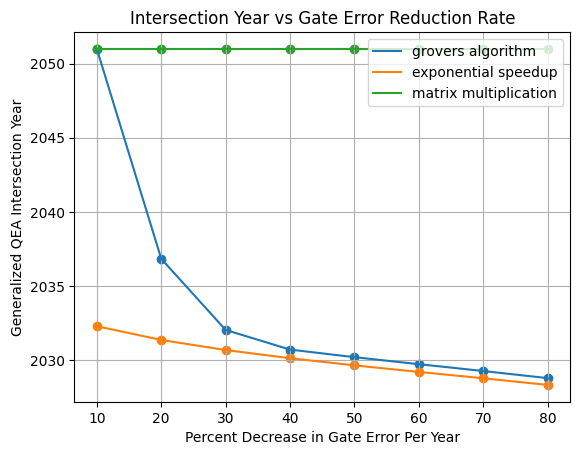

In [22]:
#now plot the intersection years vs error reduction
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"], label="grovers algorithm")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"], label="exponential speedup")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"], label="matrix multiplication")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Gate Error Per Year")
plt.title("Intersection Year vs Gate Error Reduction Rate")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("Figures/intersection_year_vs_error_reduction_rate.png")
plt.show()


# Grover Analysis

In [11]:

#heurisitic for findin the intesection when you know the 
def find_intersection_year(years, line1, line2):
    # Find where the difference between lines is closest to zero
    differences = np.abs(np.array(line1) - np.array(line2))
    intersection_idx = np.argmin(differences)
    return years[intersection_idx], line1[intersection_idx]

In [15]:
# Define runtime complexity expressions
classical_runtime = "n"
quantum_runtime = "n**0.5"

# Generate year range for analysis
years = np.arange(2025, 2050, .3)

# Calculate problem sizes and advantages across years
quantum_problem_sizes = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]
classical_problem_sizes = [
    find_largest_problem_size(classical_runtime, year, quantum=False) for year in years
]
classical_problem_sizes_stagnation = [
    find_largest_problem_size(classical_runtime, year, quantum=False, stagnation_year=2030) for year in years
]
quantum_advantage_size_by_year_list = [
    quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime) for year in years
]

# Helper functions for finding intersections
def get_quantum_size(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

def get_quantum_advantage(year):
    return quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime)

# Find IBM intersection point
intersection_year = binary_search_intersection(get_quantum_size, get_quantum_advantage, 2025, 2050)
intersection_value = get_quantum_size(intersection_year)

# Find google intersection point using modified helper
def get_google_size(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True, roadmap=Google_roadmap)

intersection_year_google = binary_search_intersection(get_google_size, get_quantum_advantage, 2025, 2050)
intersection_value_google = get_google_size(intersection_year_google)



/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/2388817641.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(intersection_year, intersection_value, 'ro', label='Intersection', color="black", linewidth=3)


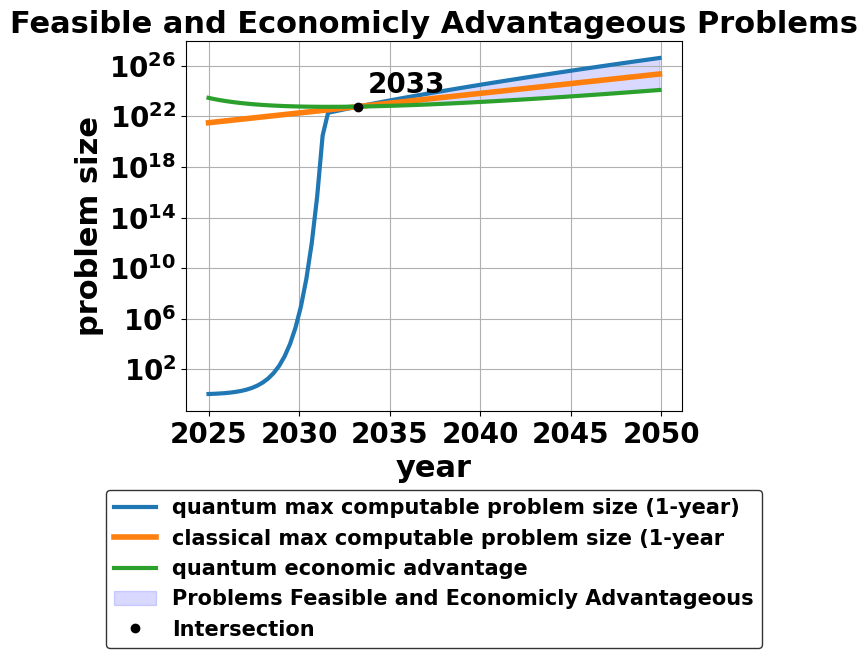

In [16]:

# Create plot
# plt.figure(figsize=(9, 6))
plt.plot(years, quantum_problem_sizes, label="quantum max computable problem size (1-year)", linewidth=3)
plt.plot(years, classical_problem_sizes, label="classical max computable problem size (1-year", linewidth=4)
plt.plot(years, quantum_advantage_size_by_year_list, label="quantum economic advantage", linewidth=3)

plt.ylabel("problem size", fontsize=22, fontweight='bold')
plt.xlabel("year", fontsize=22, fontweight='bold')
plt.yscale("log")
plt.grid()

plt.fill_between(years, quantum_advantage_size_by_year_list, quantum_problem_sizes, 
                 where=(np.array(quantum_problem_sizes) > np.array(quantum_advantage_size_by_year_list)), 
                 color='blue', alpha=0.15, label='Problems Feasible and Economicly Advantageous')

plt.plot(intersection_year, intersection_value, 'ro', label='Intersection', color="black", linewidth=3)
intersection_year = int(round(intersection_year))
plt.annotate(f'{intersection_year}',
            xy=(intersection_year, intersection_value),
            xytext=(10, 10), textcoords='offset points', fontsize=20, fontweight='bold')

plt.xticks(fontsize=20, fontweight='bold')
# tick_positions = np.logspace(0, 30, num=4, base=10)
plt.yticks(fontsize=20, fontweight='bold')

font_properties = FontProperties()
font_properties.set_size(15)
font_properties.set_weight('bold')
plt.legend(loc='lower center',
          bbox_to_anchor=(0.5, -0.67),
          frameon=True,
          facecolor='white',
          edgecolor='black', 
          prop=font_properties)

plt.title("Feasible and Economicly Advantageous Problems", fontsize=22, fontweight='bold')
plt.savefig("Figures/GroversIBM.png", dpi=300, bbox_inches='tight')


## Grover's Analysis with Stagnation 

# Exponential Advantage Analysis

# Bolder Version For Poster

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/97470600.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(intersection_year, intersection_value, 'ro', label='Intersection', color="black")


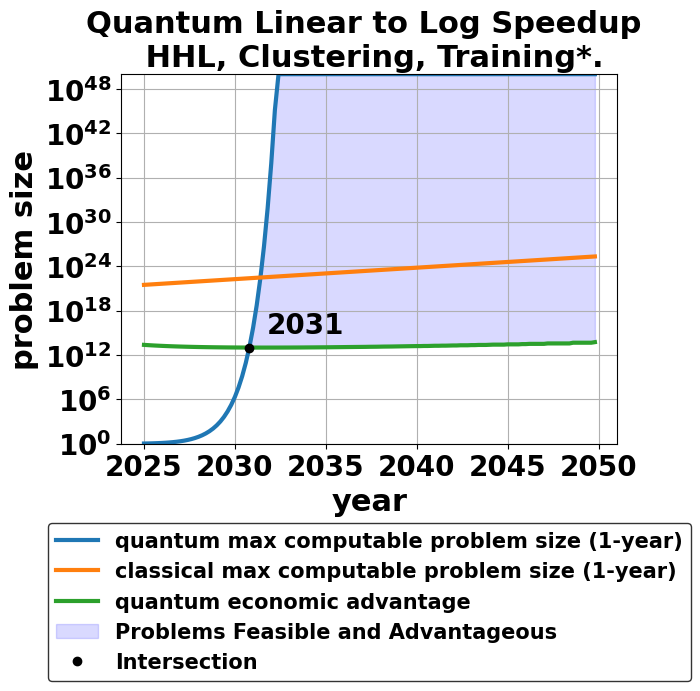

In [17]:
#bolder version for poster 
classical_runtime = "n"
quantum_runtime = "log(n,2)"
# graph largeset problem size vs year for grovers algorithms
years = np.arange(2025, 2050, .2)
quantum_problem_sizes = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]
classical_problem_sizes = [
    find_largest_problem_size(classical_runtime, year, quantum=False) for year in years
]
classical_problem_sizes_stagnation = [
    find_largest_problem_size_stagnation(classical_runtime, year, quantum=False) for year in years
]
quantum_advantage_size_by_year_list= [
quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime) for year in years
]

def find_largest_problem_size_func(year):
    return find_largest_problem_size(quantum_runtime, year, quantum=True)

def quantum_advantage_size_by_year_func(year):
    return quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime)
# Find the intersection year using binary search
intersection_year = binary_search_intersection(find_largest_problem_size_func, quantum_advantage_size_by_year_func, 2025, 2050)

# Find the intersection value
intersection_value = find_largest_problem_size(quantum_runtime, intersection_year, quantum=True)


# ploting fucntionality 

#plotting code 
plt.plot(years, quantum_problem_sizes, label="quantum max computable problem size (1-year)", linewidth=3)
# plt.plot(years, quantum_economic_advantages, label="quantum economic advantage")
plt.plot(years, classical_problem_sizes, label="classical max computable problem size (1-year)", linewidth=3)
# plt.plot(years, classical_problem_sizes_stagnation, label="classical stagnation")
plt.plot(years, quantum_advantage_size_by_year_list, label="quantum economic advantage", linewidth=3)
plt.ylabel("problem size", fontsize=22, fontweight='bold')
plt.xlabel("year", fontsize=22, fontweight='bold')
tick_positions = np.logspace(0, 50, num=10, base=10)
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.yscale("log")
plt.title("Quantum Linear to Log Speedup \n HHL, Clustering, Training*.", fontsize=22, fontweight='bold')
plt.grid() 


plt.ylim(1, 1e50)

plt.fill_between(years, quantum_advantage_size_by_year_list, quantum_problem_sizes,
                    where=(np.array(quantum_problem_sizes) > np.array(quantum_advantage_size_by_year_list)),
                    color='blue', alpha=0.15, label='Problems Feasible and Advantageous')

plt.plot(intersection_year, intersection_value, 'ro', label='Intersection', color="black")
intersection_year = int(round(intersection_year))
plt.annotate(f'{intersection_year}',
            xy=(intersection_year, intersection_value),
            xytext=(10, 10), textcoords='offset points', fontsize=20, fontweight='bold')

plt.legend(
          loc='lower center',
          bbox_to_anchor=(0.5, -0.67),
          frameon=True,  # Adds a frame around the legend
          facecolor='white',  # White background
          edgecolor='black', prop=font_properties)
plt.savefig("Figures/HHL_IBM.png", dpi=300, bbox_inches='tight')



#Graph using googel roadmap
#=========================================================================
# quantum_problem_sizes_google = [
#     find_largest_problem_size(quantum_runtime, year, quantum=True, roadmap=Google_roadmap) for year in years
# ]


# #find intersection year for google
# def find_largest_problem_size_func(year):
#     return find_largest_problem_size(quantum_runtime, year, quantum=True, roadmap=Google_roadmap)

# def quantum_advantage_size_by_year_func(year):
#     return quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime)
# # Find the intersection value
# # Find the intersection year using binary search
# intersection_year_google = binary_search_intersection(find_largest_problem_size_func, quantum_advantage_size_by_year_func, 2025, 2050)

# intersection_value_google = find_largest_problem_size(quantum_runtime, intersection_year_google, quantum=True, roadmap=Google_roadmap)

# plt.figure()
# plt.plot(years, quantum_problem_sizes_google, label="quantum max computable problem size (1-year)", linewidth=3)
# plt.plot(years, classical_problem_sizes, label="classical max computable problem size (1-year)", linewidth=3)
# plt.plot(years, quantum_advantage_size_by_year_list, label="quantum economic advantage", linewidth=3)
# plt.ylabel("problem size", fontsize=22, fontweight='bold')
# plt.xlabel("year", fontsize=22, fontweight='bold')
# # plt.xticks(fontsize=20)
# # plt.yticks(fontsize=20)
# # tick_positions = np.logspace(12, 50, num=(50-12)+1)
# plt.yticks(tick_positions, fontsize=20, fontweight='bold')
# plt.xticks(fontsize=20, fontweight='bold')
# plt.yscale("log")
# # plt.title("Quantum Linear to Log Speedup \n HHL, Clustering, Training*.", fontsize=22, fontweight='bold')
# plt.grid()

# plt.fill_between(years, quantum_advantage_size_by_year_list, quantum_problem_sizes_google, 
#                     where=(np.array(quantum_problem_sizes_google) > np.array(quantum_advantage_size_by_year_list)), 
#                     color='blue', alpha=0.15, label='Problems Feasible and Advantageous')

# plt.plot(intersection_year_google, intersection_value_google, 'ro', label='Intersection', color="black")
# intersection_year_google = int(round(intersection_year_google))
# plt.annotate(f'{intersection_year_google}',
#             xy=(intersection_year_google, intersection_value_google),
#             xytext=(10, 10), textcoords='offset points', fontsize=20, fontweight='bold')
# plt.ylim(1, 1e50)
# # plt.yticks([10**i for i in range(0, 48, 12)], fontsize=20, fontweight='bold')
# plt.xticks(fontsize=20, fontweight='bold')
# plt.yticks(fontsize=20, fontweight='bold')
# plt.show()



# Matrix Multiplication Analysis 

# Bold Version For Poster

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


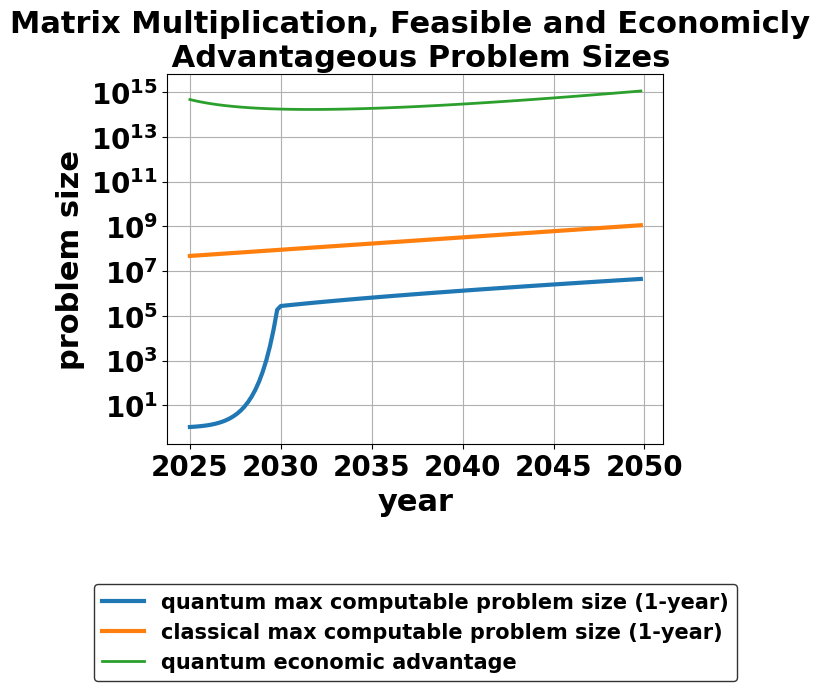

In [18]:
classical_runtime = "n**2.8"
quantum_runtime = "n**2"
# graph largeset problem size vs year for grovers algorithms
years = np.arange(2025, 2050, .2)
quantum_problem_sizes = [
    find_largest_problem_size(quantum_runtime, year, quantum=True) for year in years
]
classical_problem_sizes = [
    find_largest_problem_size(classical_runtime, year, quantum=False) for year in years
]
quantum_problem_sizes_google = [
    find_largest_problem_size(quantum_runtime, year, quantum=True, roadmap=Google_roadmap) for year in years
]
quantum_advantage_size_by_year_list= [
    quantum_advantage_size_by_year(year, classical_runtime_string=classical_runtime, quantum_runtime_string=quantum_runtime) for year in years
]

# plt.figure(1)
plt.xticks(fontsize=20, fontweight='bold')
tick_position = np.logspace(0, 15, num=4, base=10)
plt.yticks(tick_position, fontsize=20, fontweight='bold')

plt.plot(years, quantum_problem_sizes, label="quantum max computable problem size (1-year)", linewidth=3)
plt.plot(years, classical_problem_sizes, label="classical max computable problem size (1-year)", linewidth=3)
plt.plot(years, quantum_advantage_size_by_year_list, label="quantum economic advantage", linewidth=2)
plt.ylabel("problem size", fontsize=22, fontweight='bold')
plt.xlabel("year", fontsize=22, fontweight='bold')
plt.yscale("log")
plt.grid()

plt.legend(
          loc='lower center',
          bbox_to_anchor=(0.5, -0.67),
          frameon=True,  # Adds a frame around the legend
          facecolor='white',  # White background
          edgecolor='black', prop=font_properties)
plt.title("Matrix Multiplication, Feasible and Economicly \n Advantageous Problem Sizes", fontsize=22, fontweight='bold')
plt.savefig("Figures/MM_IBM.png", dpi=300, bbox_inches='tight')




# Second plot
#====================================================================================
# plt.figure(2)
# plt.plot(years, quantum_problem_sizes_google, label="quantum max computable problem size (1-year)", linewidth=3)
# plt.plot(years, classical_problem_sizes, label="classical max computable problem size (1-year)", linewidth=3)
# plt.plot(years, quantum_advantage_size_by_year_list, label="quantum economic advantage", linewidth=3)
# plt.ylabel("problem size", fontsize=22, fontweight='bold')
# plt.xlabel("year", fontsize=22, fontweight='bold')
# plt.grid()
# # Set ticks for the second plot AFTER creating it
# plt.xticks(fontsize=20, fontweight='bold')
# plt.yticks(tick_position, fontsize=20, fontweight='bold')
# plt.yscale("log")

# plt.show()



In [19]:
print([10**i for i in range(0, 15, 5)])
print(np.logspace(0, 15, num=4, base=10))

[1, 100000, 10000000000]
[1.e+00 1.e+05 1.e+10 1.e+15]


# Sensitivity Analaysis

## Sensitivity Error Reduction Rate

In [29]:
# find the intersection of quantum max computable problem size and quantum economic advantage use binary search intersection 
error_reduction_rate = .2
gate_speed_improvement_rate = .15
classical_speed_init = 1/(5*1e9) # seconds
superconducting_gate_speed_init = (1/(5*1e9))*(10**3.78) # seconds
initial_error = 10**(-2.5)
classical_speed_improvement_rate = .3
number_of_processors = 1e5


# First runtime pair: n vs n^0.5
# Define runtime pairs
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]

def get_intersection_year(quantum_runtime, classical_runtime, start_year=2024, end_year=2030):
    """Find intersection year for given runtime pair"""
    def find_largest_size(year):
        return find_largest_problem_size(quantum_runtime, year, quantum=True)
        
    def quantum_advantage_size(year):
        return quantum_advantage_size_by_year(year, classical_runtime, quantum_runtime)
        
    return binary_search_intersection(find_largest_size, quantum_advantage_size, start_year, end_year)

# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
error_reduction_ranges = np.arange(0.1, 0.9, 0.1)
intersection_results_error_reduction = {name: [] for _, _, name in runtime_pairs}

for error_rate in error_reduction_ranges:
    error_reduction_rate = error_rate
    
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=2024, end_year=2051)
        intersection_results_error_reduction[name].append(year)

Initial intersection year for Grover's Algorithm: 2029.999994277954
Initial intersection year for Exponential Speedup: 2029.999994277954
Initial intersection year for Matrix Multiplication: 2029.999994277954


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


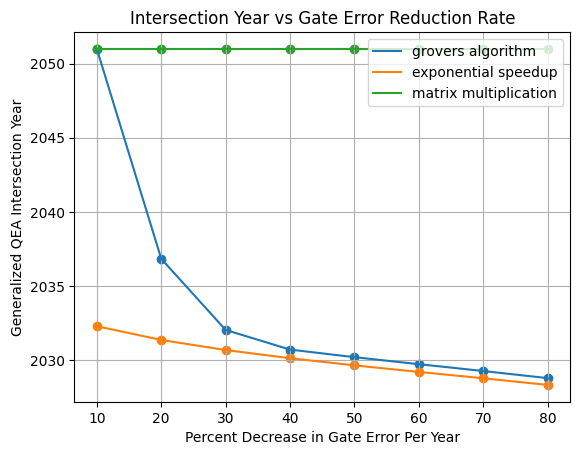

In [30]:
#now plot the intersection years vs error reduction
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"], label="grovers algorithm")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"], label="exponential speedup")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"])
plt.plot(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"], label="matrix multiplication")
plt.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Gate Error Per Year")
plt.title("Intersection Year vs Gate Error Reduction Rate")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("Figures/intersection_year_vs_error_reduction_rate.png")
plt.show()


## Sensitivity to Gate Speed Improvement

In [1]:
# find the intersection of quantum max computable problem size and quantum economic advantage use binary search intersection 
error_reduction_rate = .2
gate_speed_improvement_rate = .15
classical_speed_init = 1/(5*1e9) # seconds
superconducting_gate_speed_init = (1/(5*1e9))*(10**3.78) # seconds
initial_error = 10**(-2.5)
classical_speed_improvement_rate = .3
number_of_processors = 1e5


# First runtime pair: n vs n^0.5
# Define runtime pairs
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]
# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
speed_improvement_ranges = np.arange(0.1, 0.9, 0.1)
intersection_results_speed_improvement = {name: [] for _, _, name in runtime_pairs}

for speed_improvement in speed_improvement_ranges:
    gate_speed_improvement_rate = speed_improvement
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=2024, end_year=2051)
        intersection_results_speed_improvement[name].append(year)


NameError: name 'get_intersection_year' is not defined

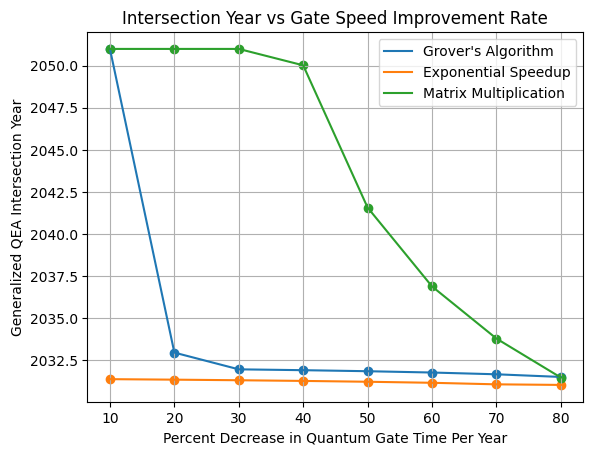

In [32]:

plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"])
plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"])
plt.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Percent Decrease in Quantum Gate Time Per Year")
plt.title("Intersection Year vs Gate Speed Improvement Rate")
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_gate_speed_improvement_rate.png")
plt.show()



In [33]:
# Analyze intersection years for different classical improvement rates and algorithm types

error_reduction_rate = .2
gate_speed_improvement_rate = .15
classical_speed_init = 1/(5*1e9) # seconds
superconducting_gate_speed_init = (1/(5*1e9))*(10**3.78) # seconds
initial_error = 10**(-2.5)
classical_speed_improvement_rate = .3
number_of_processors = 1e5

# First runtime pair: n vs n^0.5
# Define runtime pairs
runtime_pairs = [
    ("n", "n**.5", "Grover's Algorithm"),
    ("n", "log(n,2)", "Exponential Speedup"),
    ("n**3", "n**2", "Matrix Multiplication")
]
# Get initial intersection years
initial_years = []
for classical_rt, quantum_rt, name in runtime_pairs:
    year = get_intersection_year(quantum_rt, classical_rt)
    initial_years.append(year)
    print(f"Initial intersection year for {name}: {year}")

# Analyze sensitivity to error reduction rate
classical_improvement_rates = np.arange(0.1, 0.9, 0.1)
intersection_results_classical_improvement = {name: [] for _, _, name in runtime_pairs}

for classical_improvement_rate in classical_improvement_rates:
    classical_speed_improvement_rate = classical_improvement_rate
    for classical_rt, quantum_rt, name in runtime_pairs:
        year = get_intersection_year(quantum_rt, classical_rt, start_year=2024, end_year=2051)
        intersection_results_classical_improvement[name].append(year)


Initial intersection year for Grover's Algorithm: 2029.999994277954
Initial intersection year for Exponential Speedup: 2029.999994277954
Initial intersection year for Matrix Multiplication: 2029.999994277954


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_90733/4210178753.py:53: RuntimeWarning: overflow encountered in scalar power
  return min(2**(predicted_qubits/surf_overhead), MAX_PROBLEM_SIZE)


Text(0.5, 1.0, 'Intersection Year vs Classical Improvement Rate for Different Runtime Complexities')

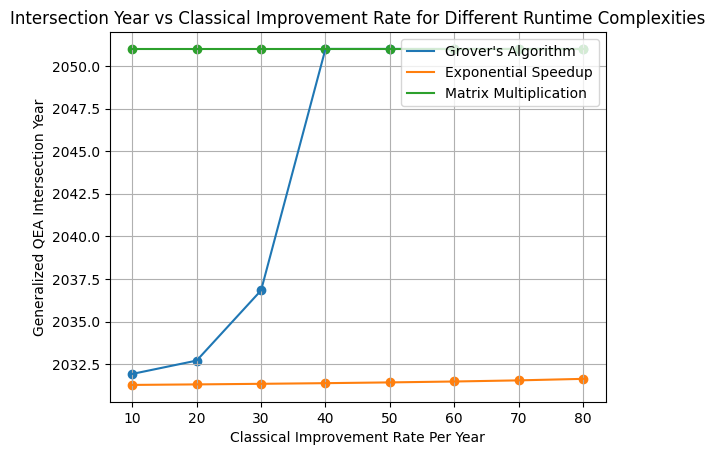

In [34]:
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"], label="Grover's Algorithm")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"])
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"], label="Exponential Speedup")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"])
plt.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"], label="Matrix Multiplication")
plt.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"])
plt.ylabel("Generalized QEA Intersection Year")
plt.xlabel("Classical Improvement Rate Per Year")
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig("Figures/intersection_year_vs_classical_improvement_rate.png")
plt.title("Intersection Year vs Classical Improvement Rate for Different Runtime Complexities")

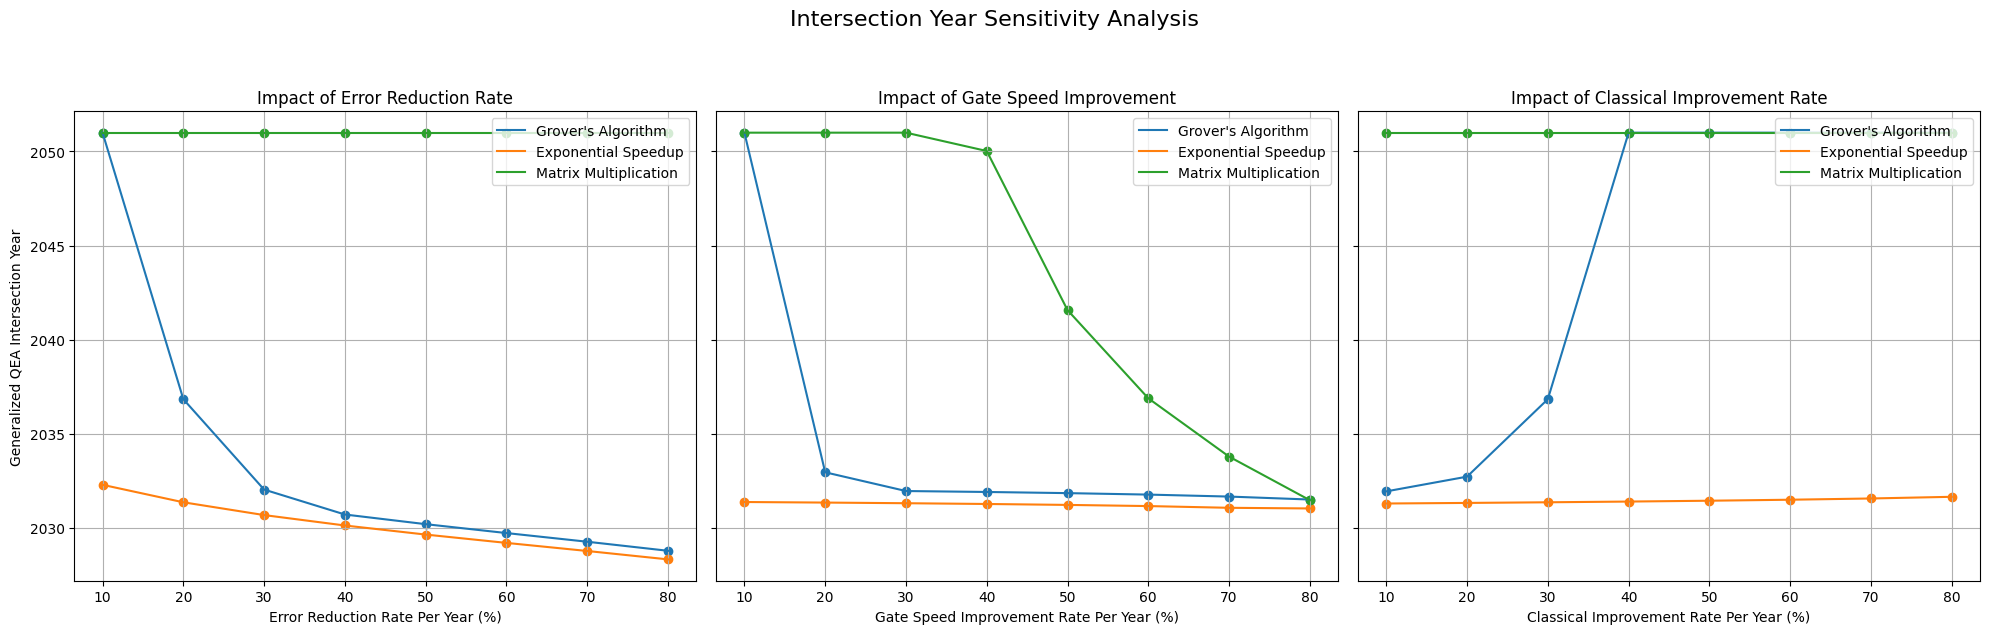

In [35]:
# Create a wide figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# First subplot - Error Reduction Rate
ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"], label="Grover's Algorithm")
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"])
ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"], label="Exponential Speedup")
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"])
ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"], label="Matrix Multiplication")
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"])
ax1.set_xlabel("Error Reduction Rate Per Year (%)")
ax1.set_ylabel("Generalized QEA Intersection Year")
ax1.grid(True)
ax1.legend(loc="upper right")
ax1.set_title("Impact of Error Reduction Rate")

# Second subplot - Gate Speed Improvement
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement   ["Grover's Algorithm"], label="Grover's Algorithm")
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"])
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"], label="Exponential Speedup")
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"])
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"], label="Matrix Multiplication")
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"])
ax2.set_xlabel("Gate Speed Improvement Rate Per Year (%)")
ax2.grid(True)
ax2.legend(loc="upper right")
ax2.set_title("Impact of Gate Speed Improvement")

# Third subplot - Classical Improvement Rate
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"], label="Grover's Algorithm")
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"])
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"], label="Exponential Speedup")
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"])
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"], label="Matrix Multiplication")
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"])
ax3.set_xlabel("Classical Improvement Rate Per Year (%)")
ax3.grid(True)
ax3.legend(loc="upper right")
ax3.set_title("Impact of Classical Improvement Rate")

# Add an overall title
fig.suptitle("Intersection Year Sensitivity Analysis", fontsize=16, y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("Figures/combined_sensitivity_analysis.png", bbox_inches='tight', dpi=300)
plt.show()

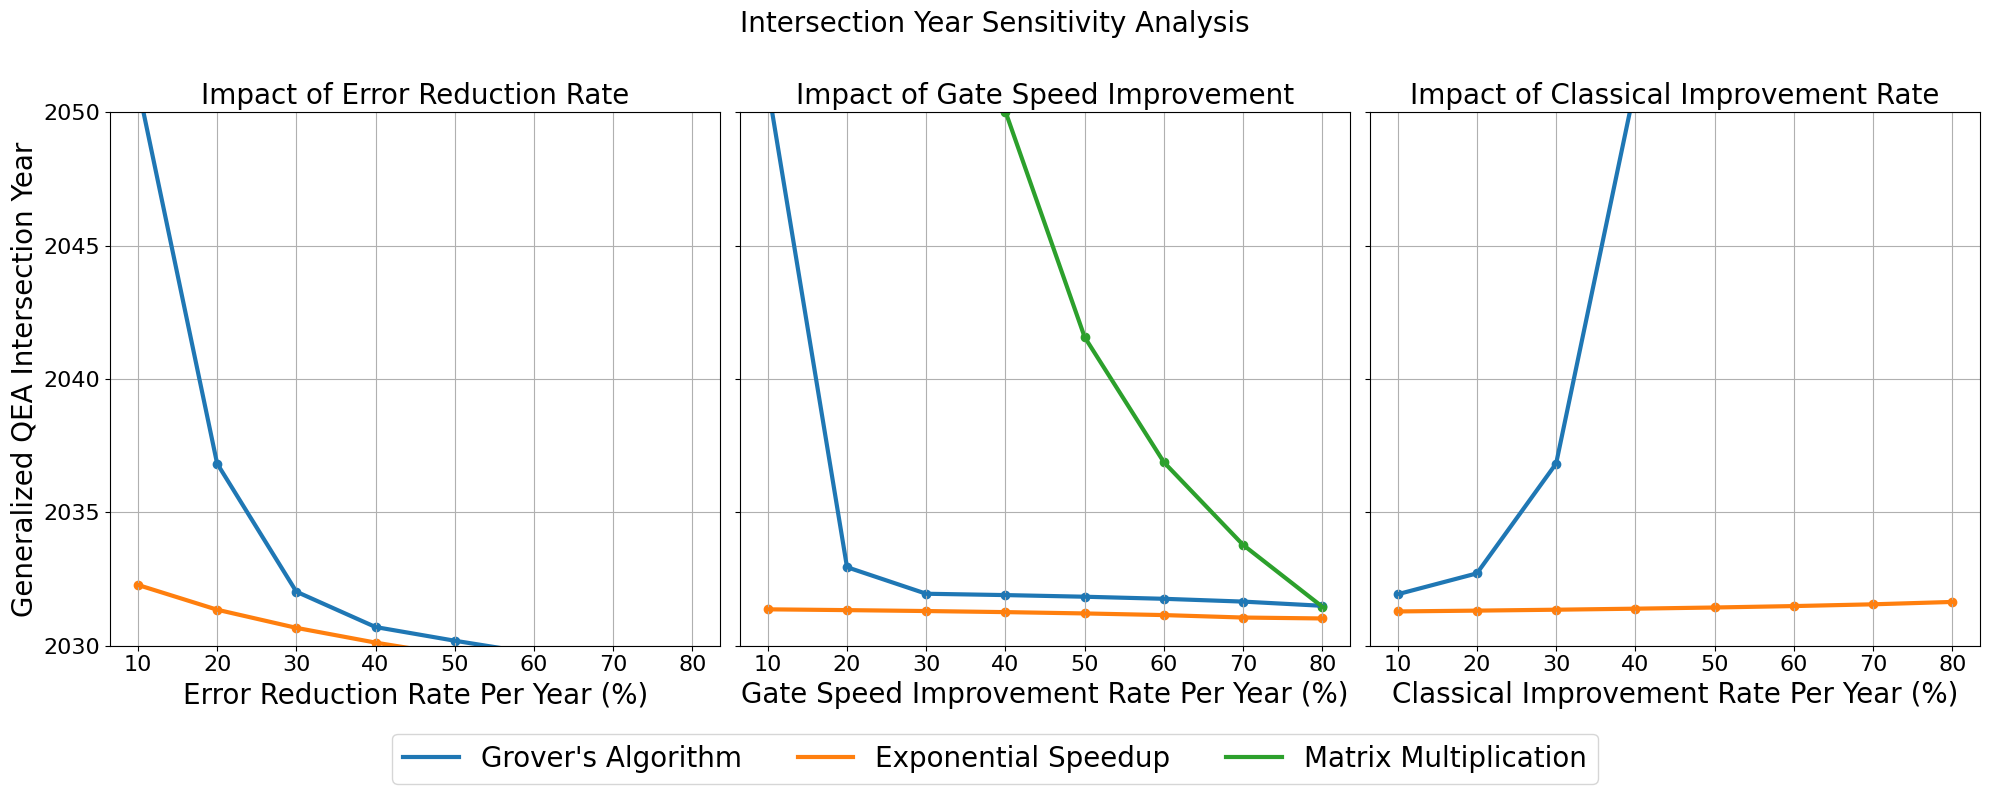

In [45]:
# Create a wide figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))  # Increased height slightly to accommodate legend

default_font_size = 20
default_line_width = 3

# First subplot - Error Reduction Rate
lines1 = ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"], label="Grover's Algorithm", linewidth=default_line_width)
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Grover's Algorithm"])
ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"], label="Exponential Speedup", linewidth=default_line_width)
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Exponential Speedup"])
ax1.plot(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"], label="Matrix Multiplication", linewidth=default_line_width)
ax1.scatter(error_reduction_ranges*100, intersection_results_error_reduction["Matrix Multiplication"])
ax1.set_xlabel("Error Reduction Rate Per Year (%)", fontsize=default_font_size)
ax1.set_ylabel("Generalized QEA Intersection Year", fontsize=default_font_size)
ax1.grid(True)
ax1.set_title("Impact of Error Reduction Rate", fontsize=default_font_size)

# Second subplot - Gate Speed Improvement
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"], linewidth=default_line_width)
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Grover's Algorithm"])
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"], linewidth=default_line_width)
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Exponential Speedup"])
ax2.plot(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"], linewidth=default_line_width)
ax2.scatter(speed_improvement_ranges*100, intersection_results_speed_improvement["Matrix Multiplication"])
ax2.set_xlabel("Gate Speed Improvement Rate Per Year (%)", fontsize=default_font_size)
ax2.grid(True)
ax2.set_title("Impact of Gate Speed Improvement", fontsize=default_font_size)
ax2.set_yticklabels([])  # Remove y-axis labels for middle plot

# Third subplot - Classical Improvement Rate
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"], linewidth=default_line_width)
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Grover's Algorithm"])
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"], linewidth=default_line_width)
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Exponential Speedup"])
ax3.plot(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"], linewidth=default_line_width)
ax3.scatter(classical_improvement_rates*100, intersection_results_classical_improvement["Matrix Multiplication"])
ax3.set_xlabel("Classical Improvement Rate Per Year (%)", fontsize=default_font_size)
ax3.grid(True)
ax3.set_title("Impact of Classical Improvement Rate", fontsize=default_font_size)
ax3.set_yticklabels([])  # Remove y-axis labels for right plot

# Set the same y-axis limits and ticks for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(2030, 2050)
    ax.set_yticks(np.arange(2030, 2055, 5))  # Set ticks every 5 years from 2030 to 2050
    ax.tick_params(axis='y', labelsize=16)  # Set font size for y-axis tick labels
    ax.tick_params(axis='x', labelsize=16)  # Set font size for x-axis tick labels

# Add an overall title
fig.suptitle("Intersection Year Sensitivity Analysis Quantum Parameters", fontsize=default_font_size, y=1.02)

# Create shared legend below the subplots
lines = ax1.get_lines()[::1]  # Get only the lines, not the scatter points
labels = ["Grover's Algorithm", "Exponential Speedup", "Matrix Multiplication"]
fig.legend(lines, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=default_font_size)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure with extra space at bottom for legend
plt.savefig("Figures/combined_sensitivity_analysis.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
#Do robustness on initial overhead, do robustness on qubit number improvement rate 

# Robustness on Qubit Size Improvement Rate

# Robustness on Clasical Overhead , Robustness of Quantum Overhead, Robustness to qubit growth 